# CML, эффективная граница и нахождение оптимального инвестиционного портфеля, используя теорию Марковица

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
import yfinance as yf

In [3]:
import seaborn as sns
sns.set_theme()

## Данные торгов по дням, используя yfinance. Загружаем заранее выбранные акции

In [4]:
data = yf.download(['PYPL', "FTNT", "LRCX","AYX", "REGN"], start="2016-11-14", end="2021-11-5", interval="1d")

[*********************100%***********************]  5 of 5 completed


In [5]:
data1 = yf.download(['COO', "MRNA", "TDC", "IBM", "HTHIY", "HPQ", "RPRX"], start="2016-11-14", end="2021-11-5", interval="1d")

[*********************100%***********************]  7 of 7 completed


In [6]:
data = pd.concat([data, data1], axis=1)

In [7]:
closeData = data.Close # используем данные по цене закрытия

In [8]:
closeData

,AYX,FTNT,LRCX,PYPL,REGN,COO,HPQ,HTHIY,IBM,MRNA,RPRX,TDC
Date,,,,,,,,,,,,
2016-11-14,NaN,31.639999,98.510002,38.810001,444.519989,170.130005,16.10,54.360001,151.252396,NaN,NaN,29.040001
2016-11-15,NaN,32.160000,101.120003,38.939999,428.649994,171.949997,15.87,54.330002,151.692154,NaN,NaN,29.040001
2016-11-16,NaN,32.540001,101.239998,39.070000,420.079987,172.000000,15.80,53.770000,152.284897,NaN,NaN,28.389999
2016-11-17,NaN,31.639999,103.800003,39.880001,404.559998,174.399994,15.89,54.299999,152.772461,NaN,NaN,28.020000
2016-11-18,NaN,30.959999,104.709999,40.080002,397.480011,172.000000,15.87,53.900002,153.336517,NaN,NaN,27.070000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-29,73.190002,336.339996,563.570007,232.589996,639.940002,416.920013,30.33,115.760002,119.598473,345.209991,39.529999,56.560001
2021-11-01,75.559998,324.109985,572.760010,231.279999,639.150024,421.940002,31.25,118.910004,120.726578,337.170013,39.730000,56.340000
2021-11-02,73.739998,328.429993,574.239990,229.460007,638.770020,420.640015,31.01,118.730003,120.630974,348.640015,38.110001,56.070000


## Графики курсов акций

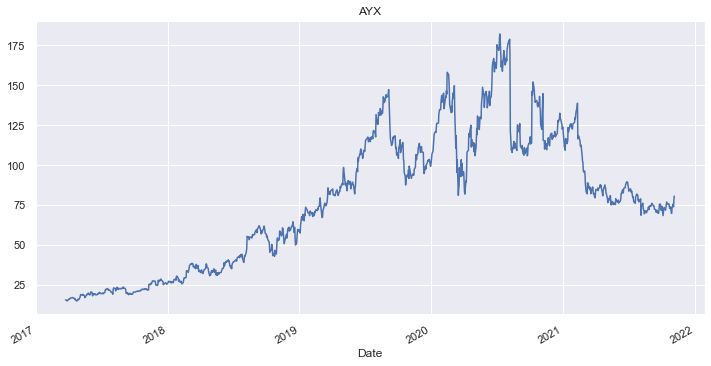

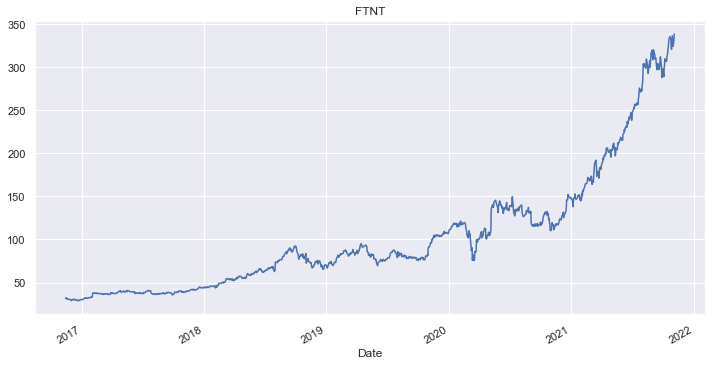

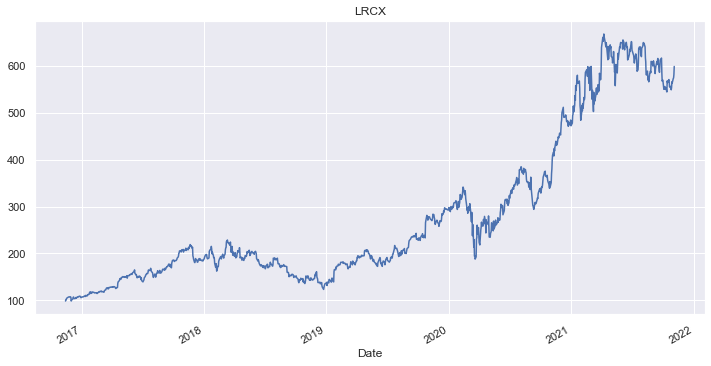

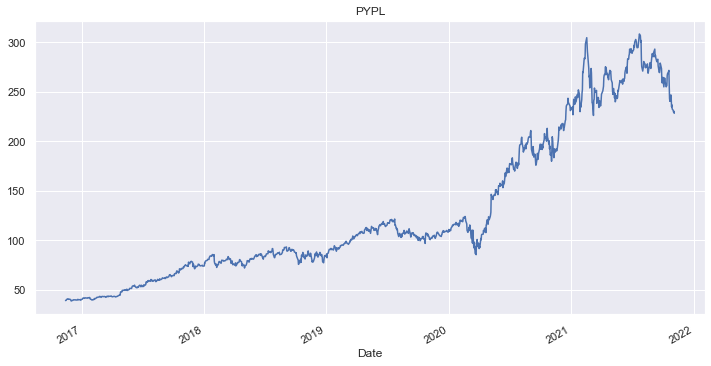

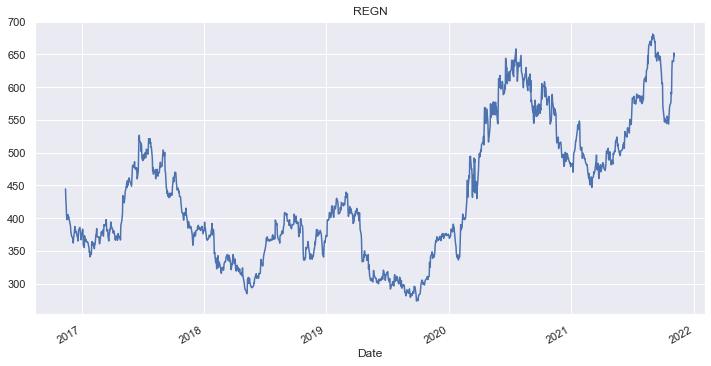

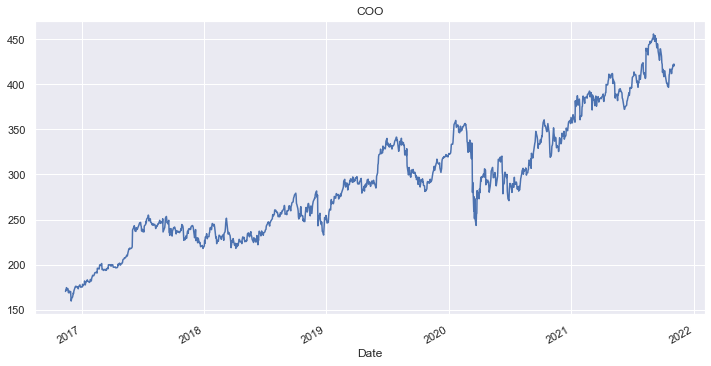

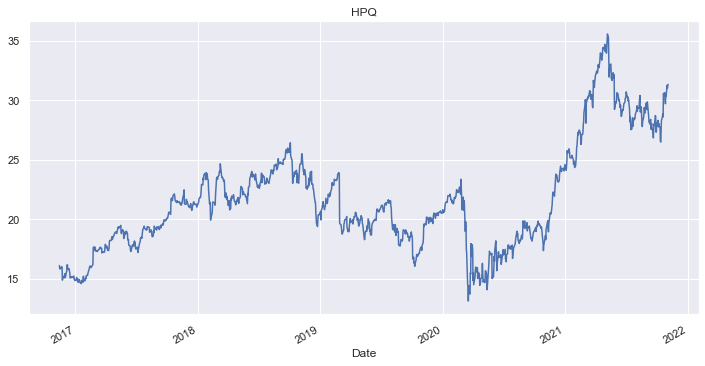

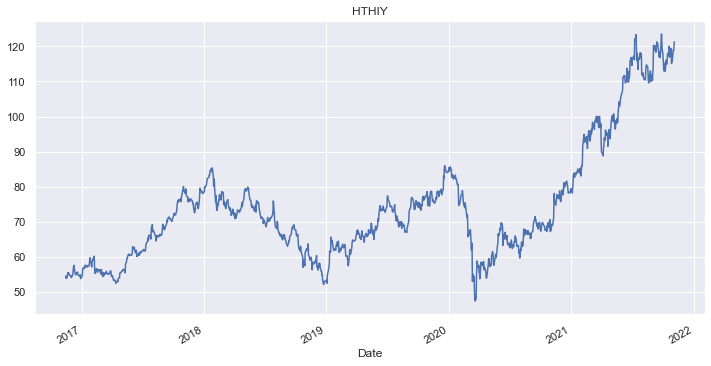

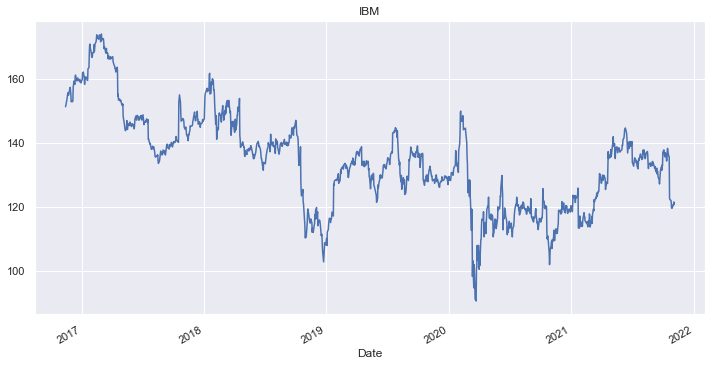

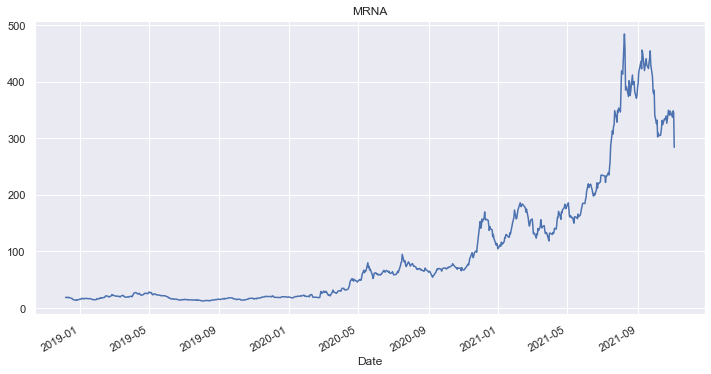

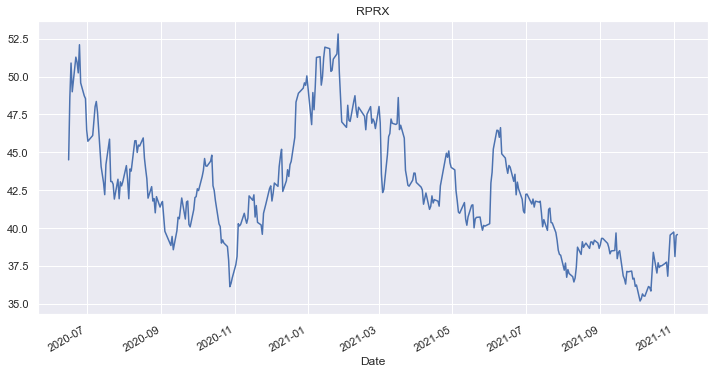

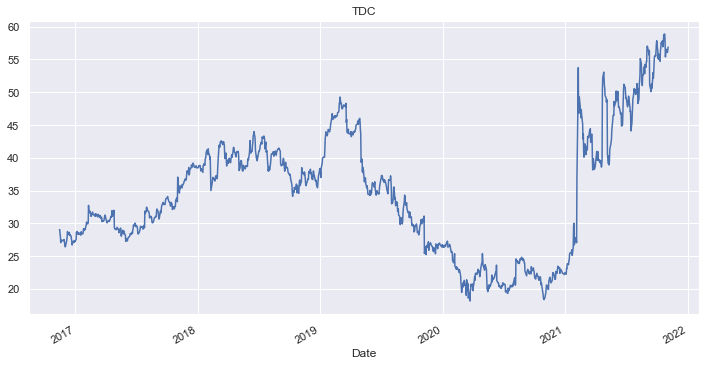

In [9]:
import matplotlib.pyplot as plt

for name in closeData.columns:
    plt.figure(figsize=(12, 6))
    closeData[name].plot()
    plt.title(name)
    plt.show()

# Дневные доходности

In [12]:
dCloseData = closeData.pct_change()
dCloseData

,AYX,FTNT,LRCX,PYPL,REGN,COO,HPQ,HTHIY,IBM,MRNA,RPRX,TDC
Date,,,,,,,,,,,,
2016-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-15,NaN,0.016435,0.026495,0.003350,-0.035701,0.010698,-0.014286,-0.000552,0.002907,NaN,NaN,0.000000
2016-11-16,NaN,0.011816,0.001187,0.003338,-0.019993,0.000291,-0.004411,-0.010307,0.003908,NaN,NaN,-0.022383
2016-11-17,NaN,-0.027658,0.025286,0.020732,-0.036945,0.013953,0.005696,0.009857,0.003202,NaN,NaN,-0.013033
2016-11-18,NaN,-0.021492,0.008767,0.005015,-0.017500,-0.013761,-0.001259,-0.007366,0.003692,NaN,NaN,-0.033904
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-29,0.049018,0.027369,-0.004205,-0.017903,0.023593,0.000432,-0.003941,-0.018151,-0.005880,-0.007789,0.034817,0.007840
2021-11-01,0.032381,-0.036362,0.016307,-0.005632,-0.001234,0.012041,0.030333,0.027211,0.009432,-0.023290,0.005059,-0.003890
2021-11-02,-0.024087,0.013329,0.002584,-0.007869,-0.000595,-0.003081,-0.007680,-0.001514,-0.000792,0.034018,-0.040775,-0.004792


## Графики дневных доходностей

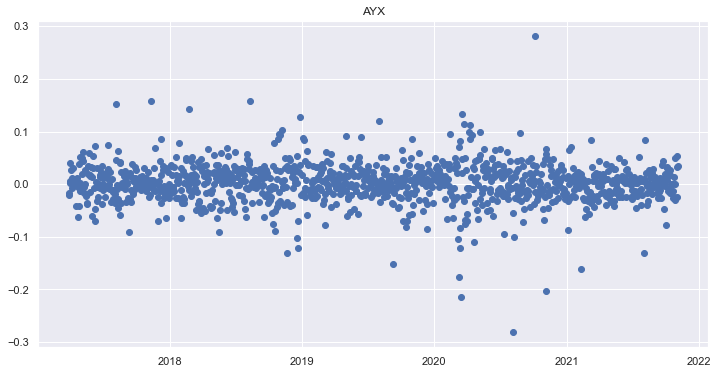

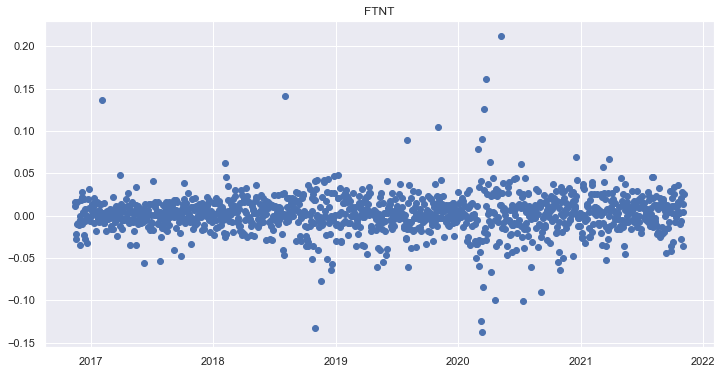

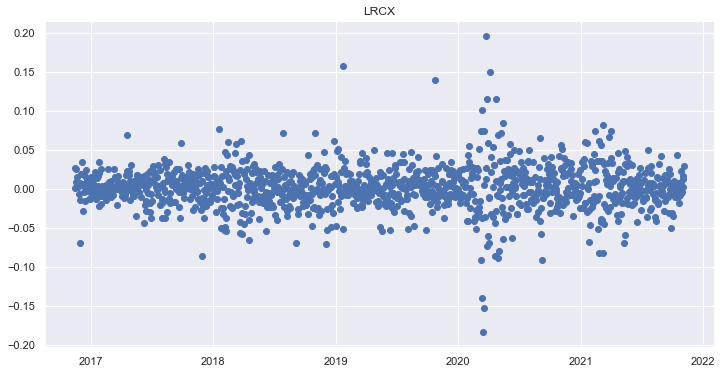

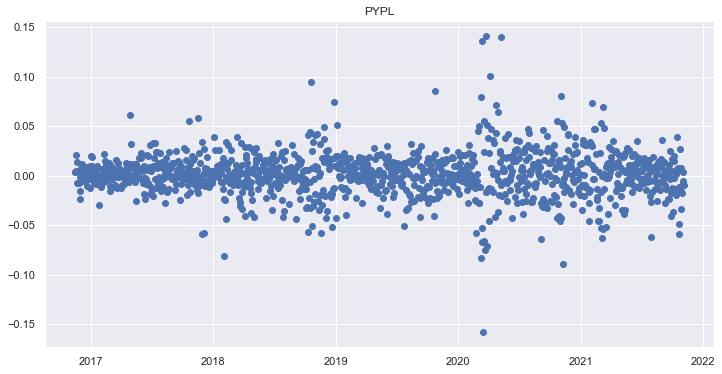

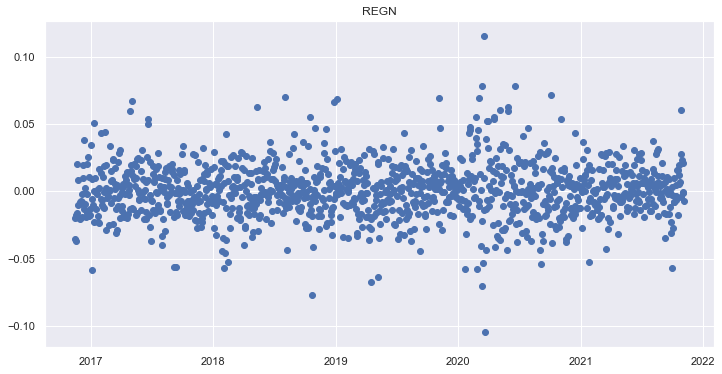

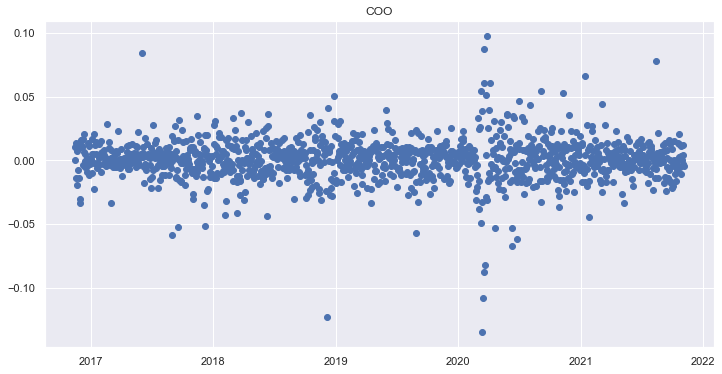

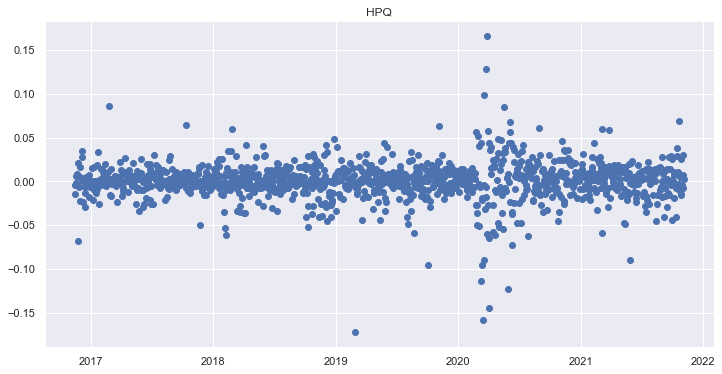

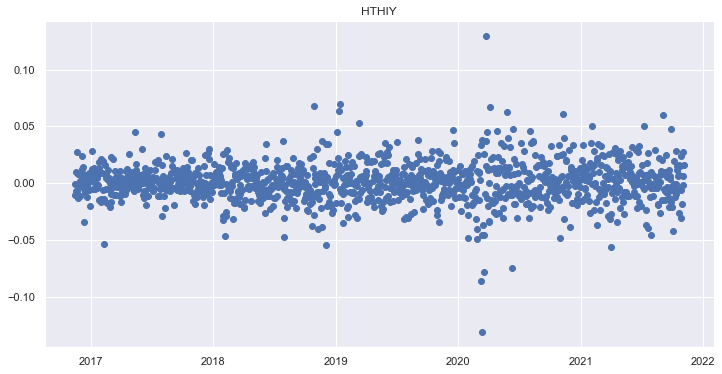

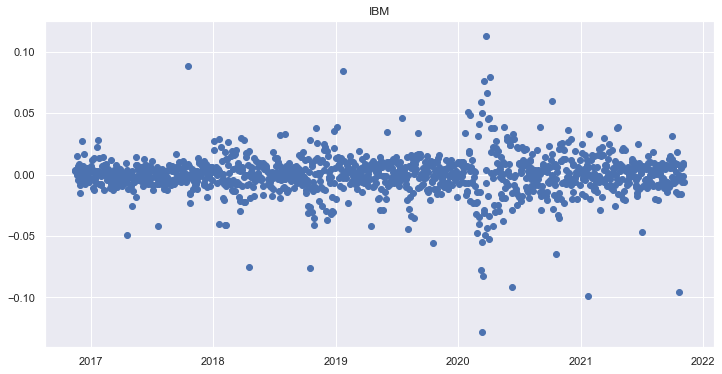

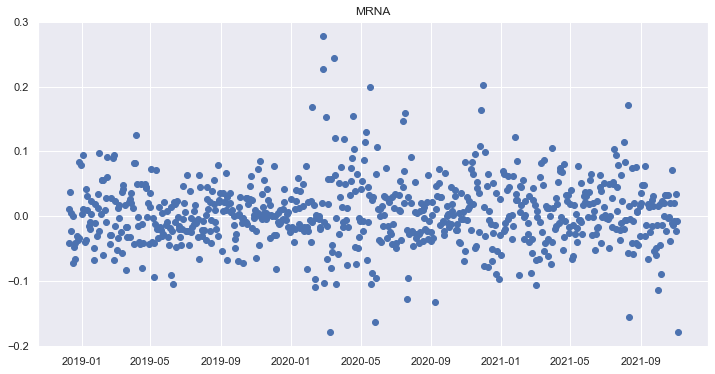

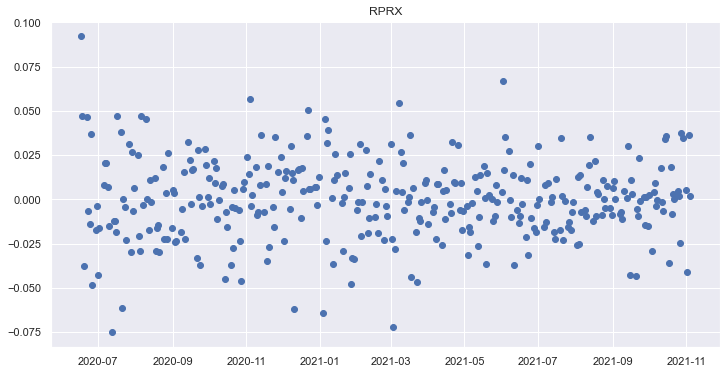

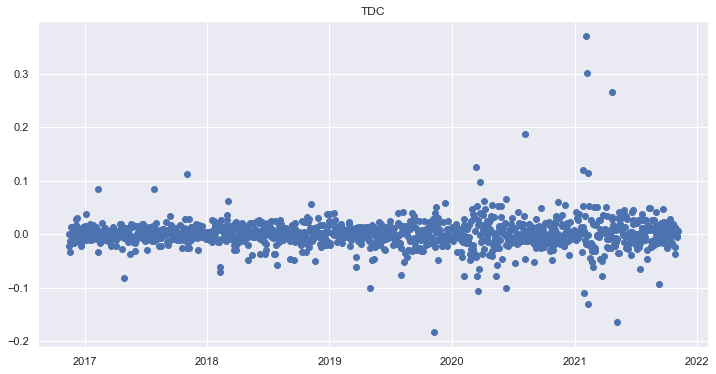

In [13]:
for name in dCloseData.columns:
    plt.figure(figsize=(12, 6))
    plt.scatter(dCloseData.index, dCloseData[name])
    plt.title(name)
    plt.show()

## Гистограмма дневных доходностей

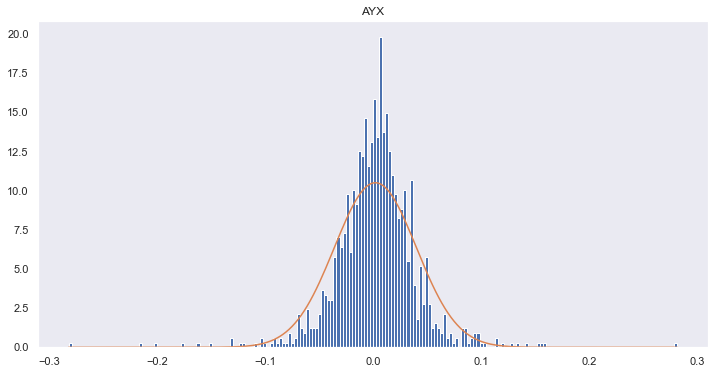

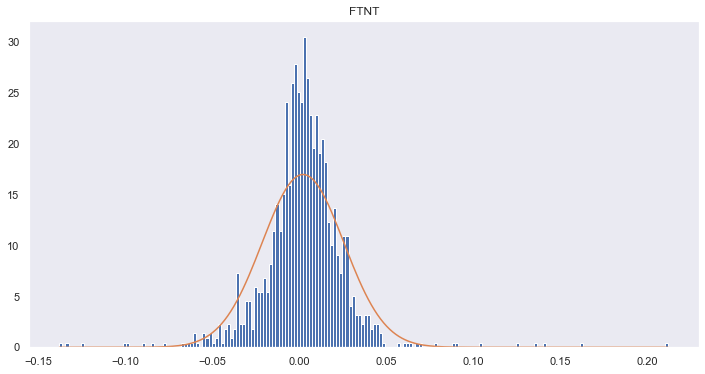

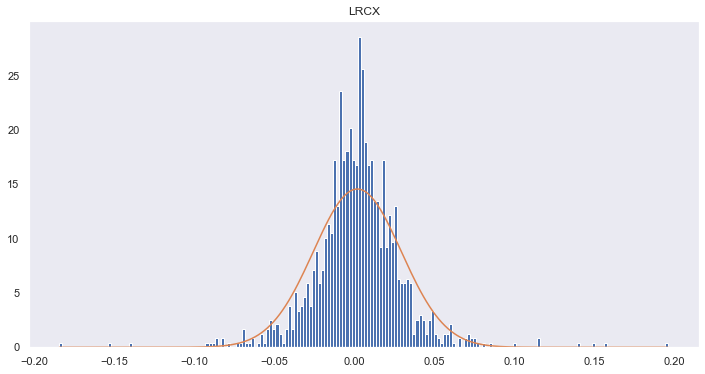

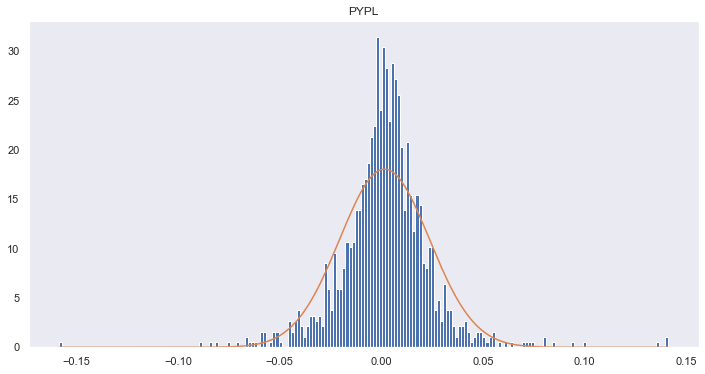

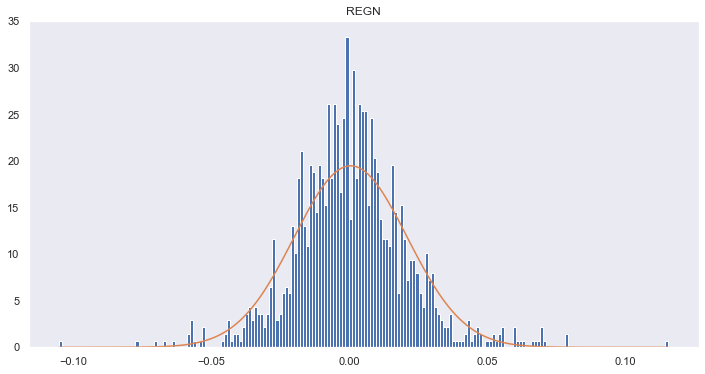

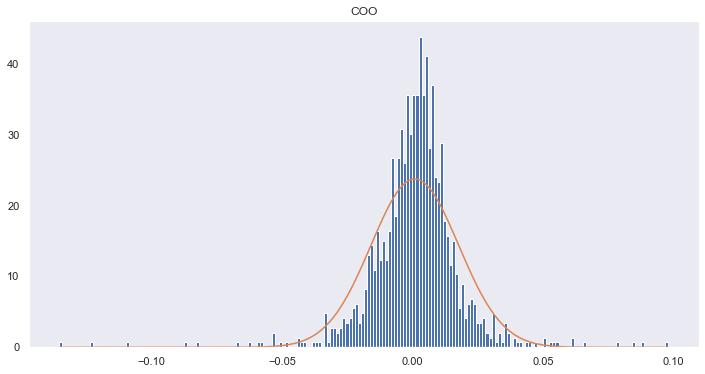

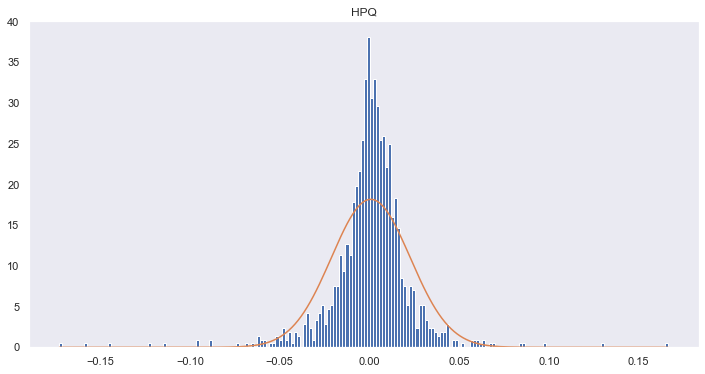

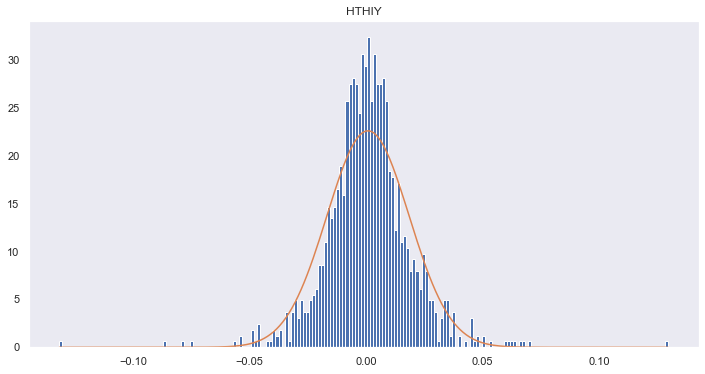

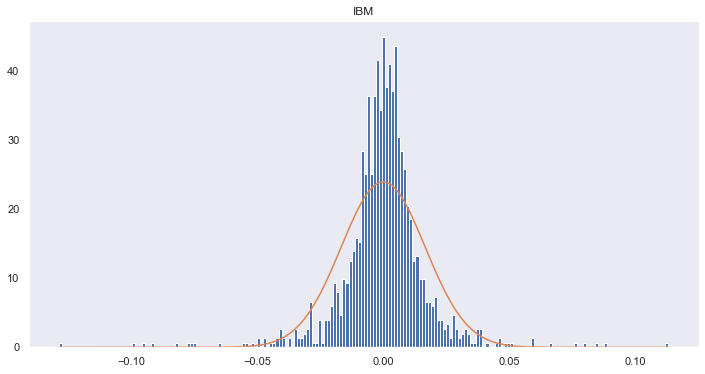

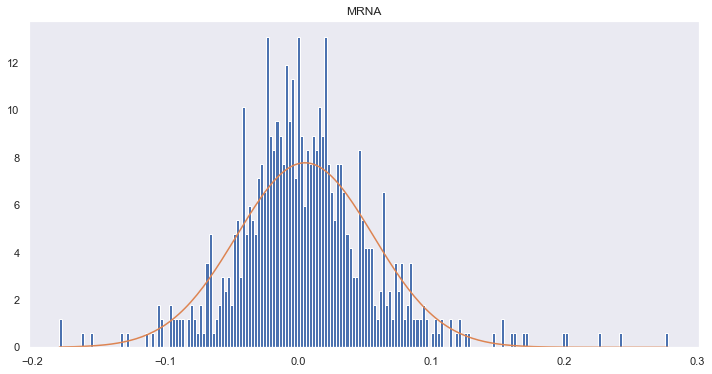

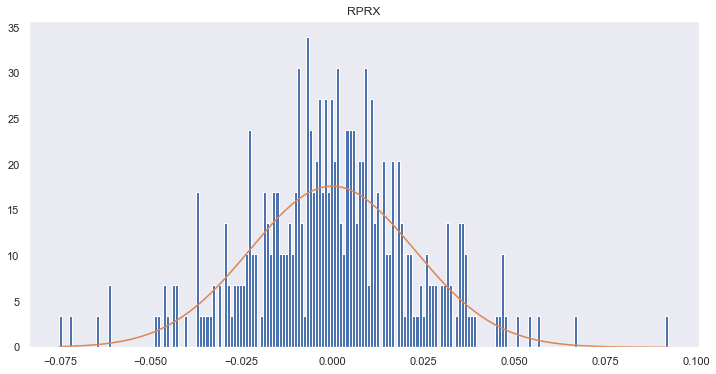

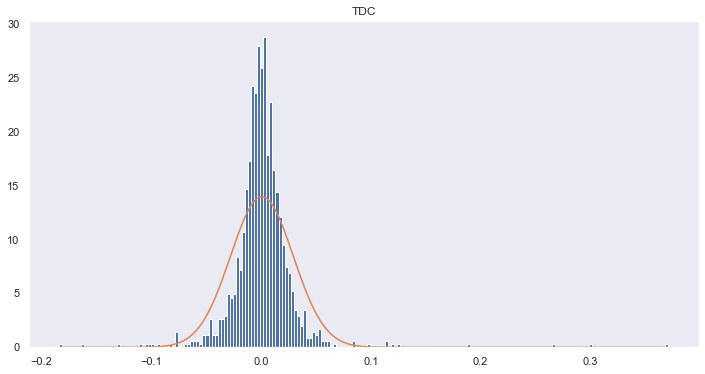

In [14]:
L = 200
for name in dCloseData.columns:
    plt.figure(figsize=(12, 6))
    plt.hist(dCloseData[name], density=True, bins=L)
    x = np.linspace(dCloseData[name].min(), dCloseData[name].max(), L)
    plt.plot(x, stats.norm.pdf(x, dCloseData[name].mean(), dCloseData[name].std()))
    plt.title(name)
    plt.grid()
    plt.show()

Вывод: визуально видно, что распределение отличается от нормального: более толстые хвосты и скошенность. В теории Марковица делалось предположение о нормальности распределения. Эта гипотеза нарушается здесь.

## Средняя доходность

In [15]:
dohMean = dCloseData.mean()
dohMean

AYX      0.002147
FTNT     0.002168
LRCX     0.001817
PYPL     0.001659
REGN     0.000509
COO      0.000866
HPQ      0.000776
HTHIY    0.000797
IBM     -0.000040
MRNA     0.005011
RPRX    -0.000079
TDC      0.000926
dtype: float64

# Ковариация доходностей

In [17]:
cov = dCloseData.cov()
cov

,AYX,FTNT,LRCX,PYPL,REGN,COO,HPQ,HTHIY,IBM,MRNA,RPRX,TDC
AYX,0.001440,0.000420,0.000372,0.000410,0.000197,0.000198,0.000253,0.000156,0.000161,0.000126,0.000219,0.000210
FTNT,0.000420,0.000550,0.000290,0.000299,0.000149,0.000161,0.000193,0.000122,0.000125,0.000182,0.000134,0.000164
LRCX,0.000372,0.000290,0.000751,0.000354,0.000171,0.000202,0.000311,0.000195,0.000212,0.000114,0.000113,0.000229
PYPL,0.000410,0.000299,0.000354,0.000488,0.000156,0.000159,0.000197,0.000132,0.000143,0.000098,0.000153,0.000178
REGN,0.000197,0.000149,0.000171,0.000156,0.000419,0.000118,0.000087,0.000056,0.000087,0.000241,0.000121,0.000068
COO,0.000198,0.000161,0.000202,0.000159,0.000118,0.000282,0.000161,0.000103,0.000119,0.000032,0.000071,0.000115
HPQ,0.000253,0.000193,0.000311,0.000197,0.000087,0.000161,0.000482,0.000144,0.000190,0.000031,0.000071,0.000194
HTHIY,0.000156,0.000122,0.000195,0.000132,0.000056,0.000103,0.000144,0.000312,0.000119,0.000028,0.000083,0.000102
IBM,0.000161,0.000125,0.000212,0.000143,0.000087,0.000119,0.000190,0.000119,0.000277,0.000014,0.000042,0.000153
MRNA,0.000126,0.000182,0.000114,0.000098,0.000241,0.000032,0.000031,0.000028,0.000014,0.002624,0.000103,0.000083


In [90]:
# cov.to_excel("cov.xlsx") 

# Случайный портфель (вектор долей)

In [18]:
cnt = len(dCloseData.columns)

def randPortf():
    res = np.exp(np.random.randn(cnt))
    res = res / res.sum() # нормируем для единичной суммы
    return res

r = randPortf()
print(r)
print(r.sum())

[0.11069198 0.04155545 0.15290838 0.18174873 0.00156751 0.02691583
 0.02775105 0.0116004  0.36245714 0.02728791 0.01712452 0.03839111]
1.0


# Доходность портфеля

In [19]:
def dohPortf(r):
    return np.matmul(dohMean.values,r) # матрица доходностей * вектор долей

r = randPortf()
print(r)
d = dohPortf(r)
print(d)

[0.00704951 0.02378999 0.13445041 0.07410449 0.35585272 0.05139296
 0.03721215 0.11889837 0.07913042 0.09208593 0.01694694 0.0090861 ]
0.0012488156546844587


# Риск портфеля

In [20]:
def riskPortf(r):
    return np.sqrt(np.matmul(np.matmul(r,cov.values),r))

r = randPortf()
print(r)
rs = riskPortf(r)
print(rs)

[0.01571094 0.0553004  0.03112176 0.10611887 0.05847572 0.07008086
 0.40678226 0.15515814 0.01398013 0.02312323 0.00636848 0.05777921]
0.015078878572478182


## Функция для построения прямой (CML), безрисковую ставку берем 2% (10 летние облигации ОФЗ)

In [22]:
def line_portf(x1, x2, y1, y2):
    k = (y2 - y1) / (x2 - x1)
    b = y1 - k*x1
    x3, x4 = -10, 200
    return x3, x4, k*x3+b, k*x4+b

# Облако портфелей

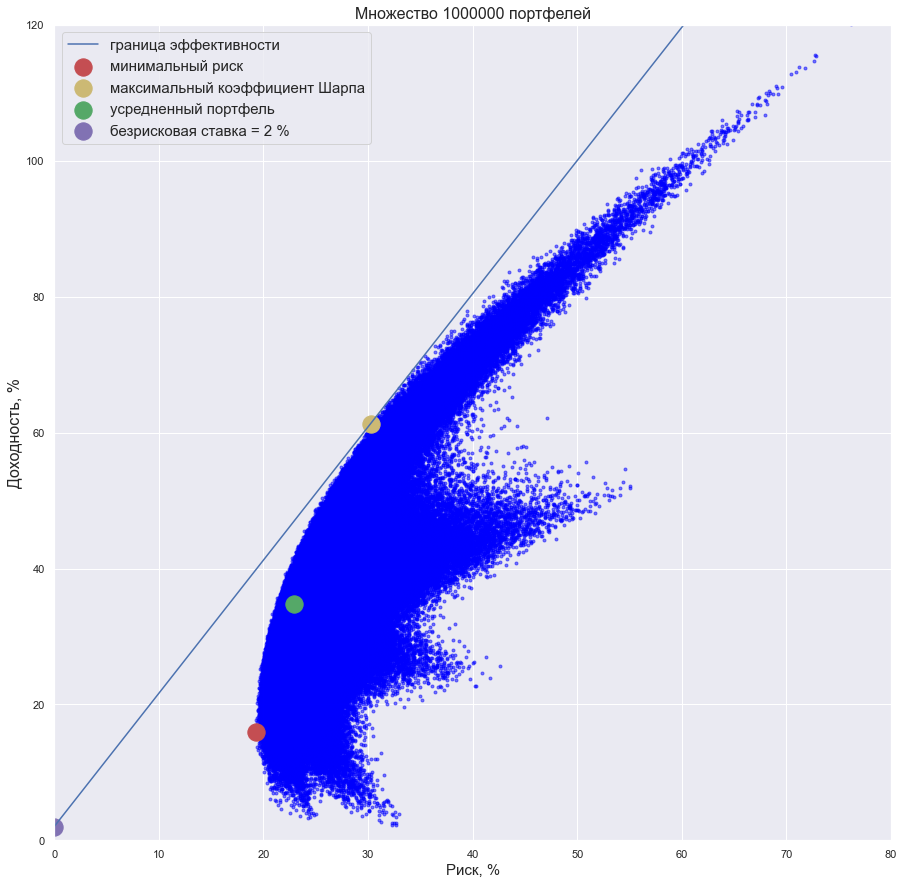

In [23]:
N = 1000000 # количество портфелей в облаке

risk = np.zeros(N)
doh = np.zeros(N)
portf = np.zeros((N,cnt))

for n in range(N):
    r = randPortf()

    portf[n,:] = r
    risk[n] = riskPortf(r)
    doh[n] = dohPortf(r)

plt.figure(figsize=(15, 15))
plt.rc('legend',fontsize=15)
plt.scatter(risk*100*np.sqrt(252),doh*100*252,c='blue',marker='.', alpha=0.5)
plt.xlabel('Риск, %', fontsize=15)
plt.ylabel('Доходность, %', fontsize=16)
plt.title(f"Множество {N} портфелей", fontsize=16)

min_risk = np.argmin(risk)
plt.scatter([(risk[min_risk])*100*np.sqrt(252)],[(doh[min_risk])*100*252],c='r',marker='o',label='минимальный риск', s=300)

maxSharpKoef = np.argmax(doh/risk)
plt.scatter([risk[maxSharpKoef]*100*np.sqrt(252)],[doh[maxSharpKoef]*100*252],c='y',marker='o',label='максимальный коэффициент Шарпа', s=300)

r_mean = np.ones(cnt)/cnt
risk_mean = riskPortf(r_mean)
doh_mean = dohPortf(r_mean)
plt.scatter([risk_mean*100*np.sqrt(252)],[doh_mean*100*252],c='g',marker='o',label='усредненный портфель', s=300)

stavka = 2
x1, x2, y1, y2 = line_portf(x1=0, x2=(float(risk[maxSharpKoef])*100.*np.sqrt(252)), y1=stavka, y2=(float(doh[maxSharpKoef])*100.*252))
plt.xlim(0, 80), plt.ylim(0, 120)
plt.plot([x1, x2], [y1, y2], label="граница эффективности")
plt.scatter(0, stavka, label=f"безрисковая ставка = {stavka} %", marker="o", c="m", s=300)

plt.legend()
plt.show()

Для оптимального портфеля получили доходность чуть больше 60 процентов, риск чуть больше 30, значит, если построить доверительный инетрвал, то в двух сигмах точно лежит положительная годовая доходность

Выведем данные найденных портфелей.

In [24]:
print('---------- Минимальный риск ----------')
print()
print("риск = %1.2f%%" % (float(risk[min_risk])*100.*np.sqrt(252)))
print("доходность = %1.2f%%" % (float(doh[min_risk])*100.*252)) 
print()
print(pd.DataFrame([portf[min_risk]*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

print('---------- Максимальный коэффициент Шарпа ----------')
print()
print("риск = %1.2f%%" % (float(risk[maxSharpKoef])*100.*np.sqrt(252)))
print("доходность = %1.2f%%" % (float(doh[maxSharpKoef])*100.*252)) 
print()
print(pd.DataFrame([portf[maxSharpKoef]*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

print('---------- Средний портфель ----------')
print()
print("риск = %1.2f%%" % (float(risk_mean)*100.*np.sqrt(252))) 
print("доходность = %1.2f%%" % (float(doh_mean)*100.*252)) 
print()
print(pd.DataFrame([r_mean*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

---------- Минимальный риск ----------

риск = 19.30%
доходность = 15.91%

         доли, %
AYX     1.281260
FTNT    4.643442
LRCX    1.000335
PYPL    0.546391
REGN   19.507441
COO     6.293358
HPQ     0.696409
HTHIY  22.508779
IBM    23.573321
MRNA    2.395814
RPRX   13.521964
TDC     4.031486

---------- Максимальный коэффициент Шарпа ----------

риск = 30.26%
доходность = 61.33%

         доли, %
AYX     4.173668
FTNT   31.811357
LRCX    7.466827
PYPL   20.532387
REGN    0.940059
COO     0.398326
HPQ     0.382455
HTHIY   7.170294
IBM     1.022173
MRNA   21.373604
RPRX    0.452588
TDC     4.276262

---------- Средний портфель ----------

риск = 22.94%
доходность = 34.77%

        доли, %
AYX    8.333333
FTNT   8.333333
LRCX   8.333333
PYPL   8.333333
REGN   8.333333
COO    8.333333
HPQ    8.333333
HTHIY  8.333333
IBM    8.333333
MRNA   8.333333
RPRX   8.333333
TDC    8.333333

